RNN

In [ ]:
import numpy as np
# 2, 3, 1
# 가장 겉의 괄호는 무시하고 숫자를 센다. 두번째 괄호가 두개 있으므로 2
# 세번째 괄호가 3개씩 있으므로 3
# 마지막 괄호들안에 원소가 1개씩 있으니까 1
values = np.array([
    [[1], 
     [2], 
     [3]],
    [[2], 
     [3], 
     [4]]
])
import tensorflow as tf
tf.reset_default_graph()

tf_values = tf.constant(values, dtype=tf.float32)
lstm_cell = tf.contrib.rnn.LSTMCell(num_units=100)
outputs, state = tf.nn.dynamic_rnn(cell=lstm_cell, dtype=tf.float32, inputs=tf_values)
print(outputs)
print(state.c) # state
print(state.h) # output

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    output_run, state_run =  sess.run([outputs, state])
    
print(output_run)
print(state_run)

In [15]:
import numpy as np
import tensorflow as tf
values = np.array([
    [[1,4], [2,5], [3,6], [4,7], [5,8]],
    [[2,5], [3,6], [4,7], [5,8], [6,9]],
    [[3,6], [4,7], [5,8], [6,9], [7,10]]
])

tf_value = tf.constant(value, dtype=tf.float32)
lstm_cell = tf.contrib.rnn.LSTMCell(num_units=100)
outputs, states = tf.nn.dynamic_rnn(cell=lstm_cell, dtype=tf.float32, inputs=tf_value)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    output_run, state_run =  sess.run([outputs, states])
    
print(output_run)
print(state_run)

[[[ 0.04514486  0.05408506 -0.04925182 ...  0.08150787 -0.09780648
   -0.08351847]
  [ 0.08606007  0.10380188 -0.07980073 ...  0.14475009 -0.1737267
   -0.13792214]
  [ 0.12446234  0.13809977 -0.09646067 ...  0.19216664 -0.22863401
   -0.16842762]
  [ 0.16085564  0.15437262 -0.10368197 ...  0.22620954 -0.2684099
   -0.18236572]
  [ 0.19592656  0.15644674 -0.10475126 ...  0.24877892 -0.2982167
   -0.18622942]]

 [[ 0.05315448  0.07100906 -0.05358587 ...  0.10067447 -0.12378272
   -0.09534624]
  [ 0.09971591  0.12240893 -0.08225002 ...  0.16883147 -0.20555514
   -0.15026939]
  [ 0.14174062  0.14881271 -0.09576154 ...  0.21374616 -0.2582122
   -0.1763704 ]
  [ 0.18058221  0.15554239 -0.10022148 ...  0.24224328 -0.29391497
   -0.18535832]
  [ 0.21778488  0.15041474 -0.09937447 ...  0.25860143 -0.31981528
   -0.18555252]]

 [[ 0.06054079  0.08371262 -0.05726071 ...  0.11578991 -0.14305335
   -0.10524794]
  [ 0.11199728  0.13291998 -0.08367479 ...  0.18653078 -0.22826256
   -0.15893361]
  [ 

In [7]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

learning_rate = 0.001
total_epoch = 10
batch_size = 128
n_input = 28
n_step = 28
n_hidden = 128
n_class = 10
n_layers = 3
n_neurons = 128

# RNN과 FC를 결합하기 위해 사용되는 변수들
X = tf.placeholder(tf.float32, [None, n_step, n_input])
Y = tf.placeholder(tf.float32, [None, n_class])

layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu) for layer in range(n_layers)]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

# # RNN 셀
# cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)
# # X 에서 자동으로 sequence 개수
# # 128 x 28 x 128
# outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
# 28 x 128 x 128
outputs = tf.transpose(outputs, [1, 0, 2])
# RNN의 마지막 값만 사용함
outputs = outputs[-1]

# 128 x 10 가중치
W = tf.Variable(tf.random_normal([n_hidden, n_class]))
b = tf.Variable(tf.random_normal([n_class]))

model = tf.matmul(outputs, W) + b
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model ,labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(total_epoch):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys= mnist.train.next_batch(batch_size)
        batch_xs = batch_xs.reshape((batch_size, n_step, n_input))
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})
        total_cost += cost_val
        
    print("Epoch:", "%04d" % (epoch + 1), "Avg. cost =", "{:.3f}".format(total_cost/ total_batch))

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 Avg. cost = 0.485
Epoch: 0002 Avg. cost = 0.161
Epoch: 0003 Avg. cost = 0.121
Epoch: 0004 Avg. cost = 0.099
Epoch: 0005 Avg. cost = 0.083
Epoch: 0006 Avg. cost = 0.078
Epoch: 0007 Avg. cost = 0.074
Epoch: 0008 Avg. cost = 0.067
Epoch: 0009 Avg. cost = 0.058
Epoch: 0010 Avg. cost = 0.061


In [3]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

test_batch_size = len(mnist.test.images)
test_xs = mnist.test.images.reshape(test_batch_size, n_step, n_input)
test_ys = mnist.test.labels

print('정확도:', sess.run(accuracy,
                       feed_dict={X: test_xs, Y: test_ys}))

정확도: 0.9633


In [17]:
tf.reset_default_graph()

tf_values = tf.constant(values, dtype=tf.float32)
lstm_cell_fw = tf.contrib.rnn.LSTMCell(100)
lstm_cell_bw = tf.contrib.rnn.LSTMCell(105)

(output_fw, output_bw), (output_state_fw, output_state_bw) =\
tf.nn.bidirectional_dynamic_rnn(cell_fw=lstm_cell_fw, cell_bw=lstm_cell_bw, inputs=tf_values, dtype=tf.float32)

print(output_fw)
print(output_bw)

print(output_state_fw.c)
print(output_state_fw.h)

print(output_state_bw.c)
print(output_state_bw.h)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    output_fw_run, output_bw_run, state_fw_run, state_bw_run = sess.run([output_fw, output_bw, output_state_fw, output_state_bw])

Tensor("bidirectional_rnn/fw/fw/transpose_1:0", shape=(3, 5, 100), dtype=float32)
Tensor("ReverseV2:0", shape=(3, 5, 105), dtype=float32)
Tensor("bidirectional_rnn/fw/fw/while/Exit_3:0", shape=(3, 100), dtype=float32)
Tensor("bidirectional_rnn/fw/fw/while/Exit_4:0", shape=(3, 100), dtype=float32)
Tensor("bidirectional_rnn/bw/bw/while/Exit_3:0", shape=(3, 105), dtype=float32)
Tensor("bidirectional_rnn/bw/bw/while/Exit_4:0", shape=(3, 105), dtype=float32)


In [18]:
tf.reset_default_graph()
X = np.random.randn(2, 10, 8)
X[1,6,:] = 0
X_lengths = [10, 6]
cell = tf.nn.rnn_cell.LSTMCell(num_units=64, state_is_tuple=True)
cell = tf.contrib.rnn.DropoutWrapper(cell=cell, output_keep_prob=0.5)
cell = tf.contrib.rnn.MultiRNNCell(cells=[cell] * 4, state_is_tuple=True)

outputs, last_states = tf.nn.dynamic_rnn(cell=cell, dtype=tf.float64, sequence_length=X_lengths, inputs=X)
result = tf.contrib.learn.run_n({"outputs":outputs, "last_states":last_states}, n=1, feed_dict=None)

ValueError: Dimensions must be equal, but are 128 and 72 for 'rnn/while/rnn/multi_rnn_cell/cell_0/lstm_cell/MatMul_1' (op: 'MatMul') with input shapes: [2,128], [72,256].

In [20]:
t_min, t_max = 0, 30
resolution = 0.1
def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)

def next_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(Ts)
    return ts[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

Text(0,0.5,'Value')

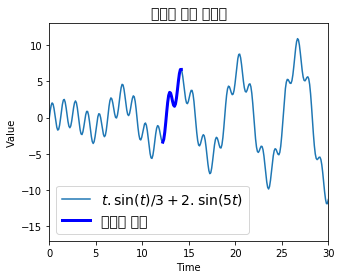

In [21]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

t = np.linspace(t_min, t_max, int((t_max-t_min)/resolution))
n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1),
                        n_steps +1)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("생성된 전체 데이터", fontsize = 14)
plt.plot(t, time_series(t), label = r"$t . \sin(t) / 3 + 2. \sin(5t)$")
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "b-", linewidth=3, label = "훈련된 부분")
plt.legend(loc = "lower left", fontsize=14)
plt.axis([0,30,-17,13])
plt.xlabel("Time")
plt.ylabel("Value")

C:\Users\acorn\Anaconda3\lib\site-packages\matplotlib\legend.py:641: UserWarning: Unrecognized location "upper class". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


Text(0.5,0,'Time')

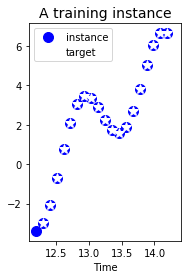

In [23]:
t = np.linspace(t_min, t_max, int((t_max-t_min)/resolution))
n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps +1)

plt.subplot(122)
plt.title("A training instance", fontsize = 14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label = "instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label = "target")
plt.legend(loc="upper class")
plt.xlabel("Time")

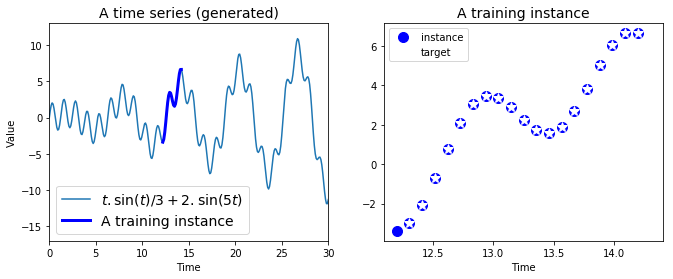

0 Training MSE: 17.273714
100 Training MSE: 3.5244672
200 Training MSE: 4.0630975
300 Training MSE: 4.1805806
400 Training MSE: 3.3266475
500 Training MSE: 3.0361392
600 Training MSE: 3.9256697
700 Training MSE: 3.0120478
800 Training MSE: 3.998634
900 Training MSE: 3.003097
INFO:tensorflow:Restoring parameters from ./my_dropout_time_series_model


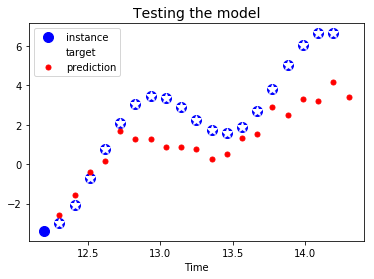

In [28]:
t_min, t_max = 0, 30
resolution = 0.1

def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)

def next_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(Ts)
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))

n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("A time series (generated)", fontsize=14)
plt.plot(t, time_series(t), label=r"$t . \sin(t) / 3 + 2 . \sin(5t)$")
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "b-", linewidth=3, label="A training instance")
plt.legend(loc="lower left", fontsize=14)
plt.axis([0, 30, -17, 13])
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.title("A training instance", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.legend(loc="upper left")
plt.xlabel("Time")
plt.show()

X_batch, y_batch = next_batch(1, n_steps)
np.c_[X_batch[0], y_batch[0]]


tf.reset_default_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

tf.reset_default_graph()

n_inputs = 1
n_neurons = 100
n_layers = 3
n_steps = 20
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

keep_prob = 0.5

cells = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
         for layer in range(n_layers)]
cells_drop = [tf.contrib.rnn.DropoutWrapper(cell, input_keep_prob=keep_prob)
              for cell in cells]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(cells_drop)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

learning_rate = 0.01

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

# this code is only usable for training, because the DropoutWrapper class has
# no training parameter, so it always applies dropout, even when the model
# is not being trained, so we must first train the model, then create a
# different model for testing, without the DropoutWrapper.

n_iterations = 1000
batch_size = 50

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        _, mse = sess.run([training_op, loss], feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            print(iteration, "Training MSE:", mse)
    
    saver.save(sess, "./my_dropout_time_series_model")

# now that the model is trained, the model must be created again,
# but without the DropoutWrapper for testing:


tf.reset_default_graph()

n_inputs = 1
n_neurons = 100
n_layers = 3
n_steps = 20
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

keep_prob = 0.5

cells = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
         for layer in range(n_layers)]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(cells)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

learning_rate = 0.01

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

loss = tf.reduce_mean(tf.square(outputs - y))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess, "./my_dropout_time_series_model")

    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})

plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()